<a href="https://colab.research.google.com/github/SergioQS/AI_and_ML/blob/main/AICourse_QC/CourseAI_week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning: Auscultando las Redes Neuronales con Python
*Cuarta semana*\
Tomado de los **modulos 12,14,15** de las notas de Diego Luis Aristizábal R,\
Quantum computing UNAL, Universidad Nacional de Colombia.\
Sergio Quiroga Sandoval



Contenido:

1. Módulo 12: imágen digital, conceptos bśsicos.
2. Módulo 14: imágen digital, convolución y filtro
4. Módulo 15: Redes neuronales convolucionales(CNN), generalidades.


## **Módulo 12**
Imágen Digital con NumPY

Las denominadas Redes Neuronales Convolucionales (CNN, por sus siglas en
inglés), en la cual su principal aplicación está en la visión artificial, son una de los temás
más importantes en el Deep Learning. Para lograr un buen entendimiento de éstas es
necesaro tener muy claro lo relacionado con temas muy básicos de las
imágenes digitales:


*   Formatos
*   Muestreo y Cuantización
*   Transformaciones de la Imagen
*   Dominio Espacial y Frecuencial (Espacio de Fourier)
*   La convolución y los Filtros Espaciales y Frecuenciales

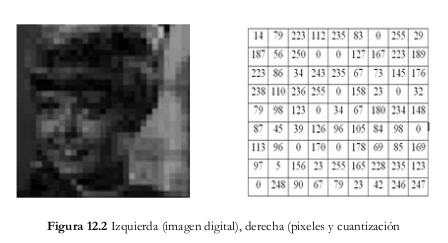

La imagen que se usará está disponible en el github del curso, [enlace](https://github.com/quantumcomputingunalmed/Course_AI/blob/ea4c488112eacc4c4d8086e0b3efe610aaecc8ed/Atardecer.jpeg).

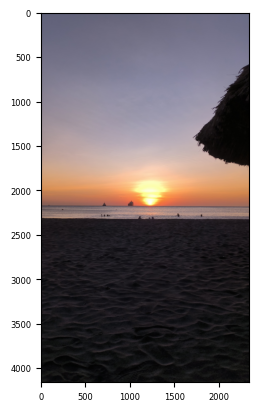

In [ ]:
# Cómo cargar una imágen con python

# Primero se debe subir una imágen al notebook y se abre con la función imread,
# esto se hace cambiando la dirección a la dirección de nuestra imágen


import matplotlib.pyplot as plt
#carga la imagen
imagen_original = plt.imread("/content/Atardecer.jpeg")
imagen = imagen_original.copy()
fig = plt.figure()
#despliega la imagen
plt.imshow(imagen)
plt.show()

<class 'numpy.ndarray'>
(4160, 2338, 3)


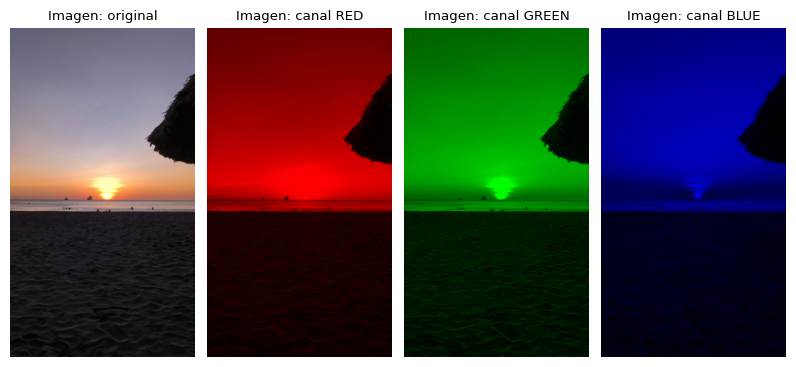

In [ ]:
#ap_12.10
import matplotlib.pyplot as plt
import time
#medir tiempo
start = time.time()
# informa cuál es el tipo de imagen
# el resultado es <class 'numpy.ndarray'>
print(type(imagen))
# informa la forma de la imagen
# el resultado es (256, 256, 3)
# tamaño 256x256 y de tres canales: RGB
print(imagen.shape)
#separar los tres canales de color
red_imagen = imagen.copy() # hacer copia
# hace ceros los canales Green y Blue
red_imagen[:,:,1] = 0
red_imagen[:,:,2] = 0
green_imagen = imagen.copy() # hacer copia
# hace ceros los canales Red y Blue
green_imagen[:,:,0] = 0
green_imagen[:,:,2] = 0
blue_imagen = imagen.copy() # hacer copia
# hace ceros los canales Red y Green
blue_imagen[:,:,0] = 0
blue_imagen[:,:,1] = 0
#preparar para desplegar cuatro imégenes
fig, axes = plt.subplots(1,4, figsize=(8, 4))
ax = axes.ravel()
plt.rcParams.update({'font.size': 8}) # tamaño de letra de los títulos
ax[0].imshow(imagen)
ax[0].set_title("Imagen: original") # título
ax[0].axis('off') # apagar ejes
ax[1].imshow(red_imagen)
ax[1].set_title("Imagen: canal RED") # título
ax[1].axis('off') # apagar ejes
ax[2].imshow(green_imagen)
ax[2].set_title("Imagen: canal GREEN") # título
ax[2].axis('off') # apagar ejes
ax[3].imshow(blue_imagen)
ax[3].set_title("Imagen: canal BLUE") # título
ax[3].axis('off') # apagar ejes
fig.tight_layout()
#finaliza tiempo

imágen.jpg (Tamaño):(4160, 2338, 3)
imágen.jpg (Dimensiones):3
imágen.jpg (Tipo):uint8
Arreglo NumPy de imágen.jpg: 
[[[ 97  97 121]
  [ 97  97 121]
  [ 97  97 121]
  ...
  [104 106 131]
  [108 110 135]
  [108 110 135]]

 [[ 97  97 121]
  [ 97  97 121]
  [ 97  97 121]
  ...
  [104 106 131]
  [105 107 132]
  [105 107 132]]

 [[ 97  97 121]
  [ 97  97 121]
  [ 97  97 121]
  ...
  [104 106 131]
  [103 105 130]
  [103 105 130]]

 ...

 [[ 21  22  17]
  [ 17  18  13]
  [ 23  24  19]
  ...
  [ 13  13  15]
  [ 13  12  17]
  [ 12  13  17]]

 [[ 13  14   9]
  [ 10  11   6]
  [ 20  21  16]
  ...
  [ 13  13  15]
  [ 17  16  21]
  [ 16  17  21]]

 [[  9  10   5]
  [  8   9   4]
  [ 22  23  18]
  ...
  [ 13  13  15]
  [ 19  18  23]
  [ 18  19  23]]]


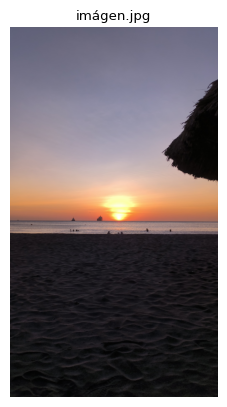

In [ ]:
#despliega información de la imagen
print("imágen.jpg (Tamaño):" + str(imagen.shape))
print("imágen.jpg (Dimensiones):" + str(imagen.ndim))
print("imágen.jpg (Tipo):" + str(imagen.dtype))
print("Arreglo NumPy de imágen.jpg: \n" + str(imagen))
fig = plt.figure()
#apagar ejes
plt.axis('off')
#título de la image
plt.title("imágen.jpg")
#despliega la imagen

plt.imshow(imagen, cmap='gray', vmin=0, vmax=255)

plt.show()

El proceso tardó: 0.48786234855651855


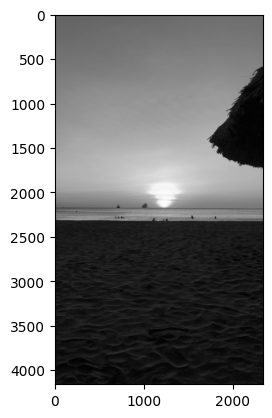

In [ ]:
# si la imágen está en RGB para pasarla a escala de grises:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

start = time.time()
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

img = plt.imread("/content/Atardecer.jpeg")
imagen = rgb2gray(img)
plt.imshow(imagen, cmap=plt.get_cmap('gray'), vmin=0, vmax=255)
end = time.time()
imagenbn = imagen.copy()
print('El proceso tardó:', end -start)
plt.show()

imagen original: imagen.jpg (dimensiones):(4160, 2338)
imagen original: imagen.jpg (tipo):float64
Arreglo NumPy de imagen original: imagen.jpg : 
[[ 99.7263  99.7263  99.7263 ... 108.2416 112.2412 112.2412]
 [ 99.7263  99.7263  99.7263 ... 108.2416 109.2415 109.2415]
 [ 99.7263  99.7263  99.7263 ... 108.2416 107.2417 107.2417]
 ...
 [ 21.1289  17.1293  23.1287 ...  13.2267  12.8677  13.1558]
 [ 13.1297  10.13    20.129  ...  13.2267  16.8673  17.1554]
 [  9.1301   8.1302  22.1288 ...  13.2267  18.8671  19.1552]]

imagen convertida: imagen.jpg (dimensiones):(4160, 2338)
imagen convertida: imagen.jpg (tipo):float32
Arreglo NumPy de imagen convertida: imagen.jpg : 
[[ 99.7263  99.7263  99.7263 ... 108.2416 112.2412 112.2412]
 [ 99.7263  99.7263  99.7263 ... 108.2416 109.2415 109.2415]
 [ 99.7263  99.7263  99.7263 ... 108.2416 107.2417 107.2417]
 ...
 [ 21.1289  17.1293  23.1287 ...  13.2267  12.8677  13.1558]
 [ 13.1297  10.13    20.129  ...  13.2267  16.8673  17.1554]
 [  9.1301   8.1302

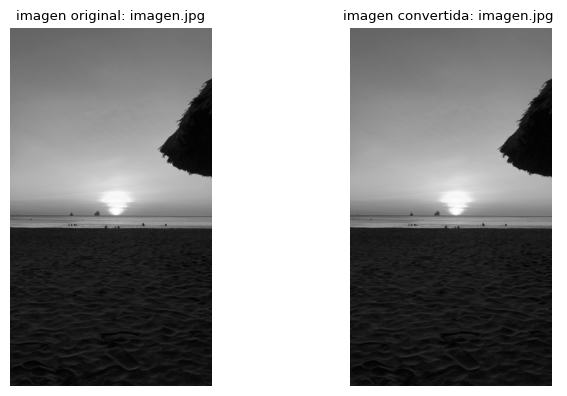

El proceso tardó: 1.3621253967285156


In [ ]:
start = time.time()
#conversión de tipos de datos de la imágen (uint64 a uint32)

imagen_convertida = np.array(imagen,dtype = np.float32)

#despliega información de la imagen de la imagen
print("imagen original: imagen.jpg (dimensiones):" + str(imagen.shape))
print("imagen original: imagen.jpg (tipo):" + str(imagen.dtype))
print("Arreglo NumPy de imagen original: imagen.jpg : \n" + str(imagen))
print("")
print("imagen convertida: imagen.jpg (dimensiones):" + str(imagen_convertida.shape))
print("imagen convertida: imagen.jpg (tipo):" + str(imagen_convertida.dtype))
print("Arreglo NumPy de imagen convertida: imagen.jpg : \n" + str(imagen_convertida))
# preparar para desplegar dos imágenes
fig, axes = plt.subplots(1,2, figsize=(8, 4))
ax = axes.ravel()

#para desplegar imagen original
ax[0].imshow(imagen,cmap='gray')
#título
ax[0].set_title("imagen original: imagen.jpg")
# apagar ejes
ax[0].axis('off')
#para desplegar imagen convertida
ax[1].imshow(imagen_convertida,cmap='gray')
#título
ax[1].set_title("imagen convertida: imagen.jpg ")
# apagar ejes
ax[1].axis('off')
#despliega la imagen
fig.tight_layout()
plt.show()
end = time.time()
print('El proceso tardó:', end -start)

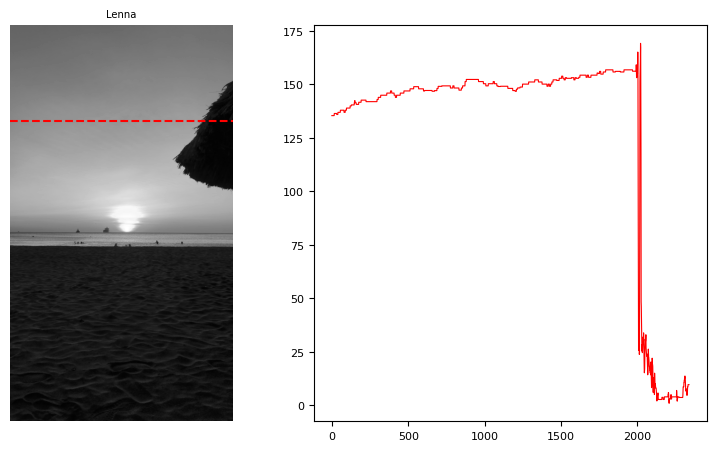

In [ ]:
#Ahora veamos la intensidad de los pixeles en una fila de la imágen.
grafico = imagen[1000, :]
# preparar para desplegar dos imágenes
fig, axes = plt.subplots(1,2, figsize=(8, 4.5))
ax = axes.ravel()
#tamaño de letra de los títulos
plt.rcParams.update({'font.size': 6})
#para desplegar imagen original
ax[0].imshow(imagen,cmap='gray')
#título
ax[0].set_title("Lenna")
# apagar ejes
ax[0].axis('off')
#dibuja línea roja sobre sobre la fila 100
#para indicar que sobre esta se hará la gráfica de intensidad
ax[0].axhline(y = 1000, color ="red", linestyle ="--")
#gráfico correspondeinet a la fila 100
ax[1].plot(grafico,color='red',linewidth=0.8)
#despliega la imagen
fig.tight_layout()
plt.show()

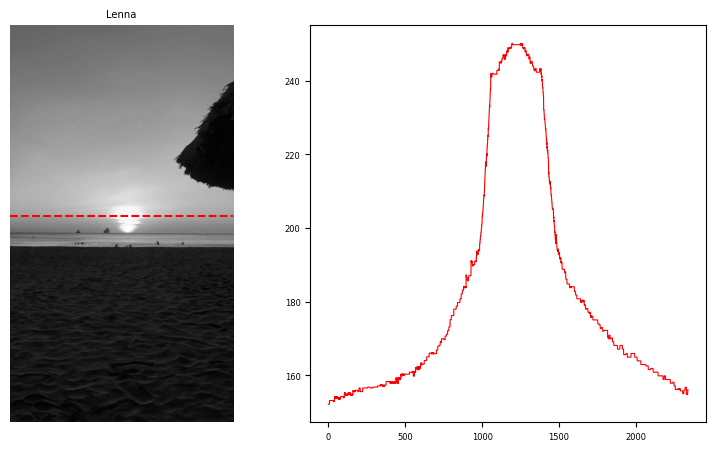

In [ ]:
#ap_12.7
#paquete para desplegar plot
import matplotlib.pyplot as plt

grafico= imagen[2000, :]
# preparar para desplegar dos imágenes
fig, axes = plt.subplots(1,2, figsize=(8, 4.5))
ax = axes.ravel()
#tamaño de letra de los títulos
plt.rcParams.update({'font.size': 6})
#para desplegar imagen original
ax[0].imshow(imagen,cmap='gray')
#título
ax[0].set_title("Lenna")
# apagar ejes
ax[0].axis('off')
#dibuja línea roja sobre sobre la fila 100
#para indicar que sobre esta se hará la gráfica de intensidad
ax[0].axhline(y = 2000, color ="red", linestyle ="--")
#gráfico correspondeinet a la fila 100
ax[1].plot(grafico,color='red',linewidth=0.8)
#despliega la imagen
fig.tight_layout()
plt.show()

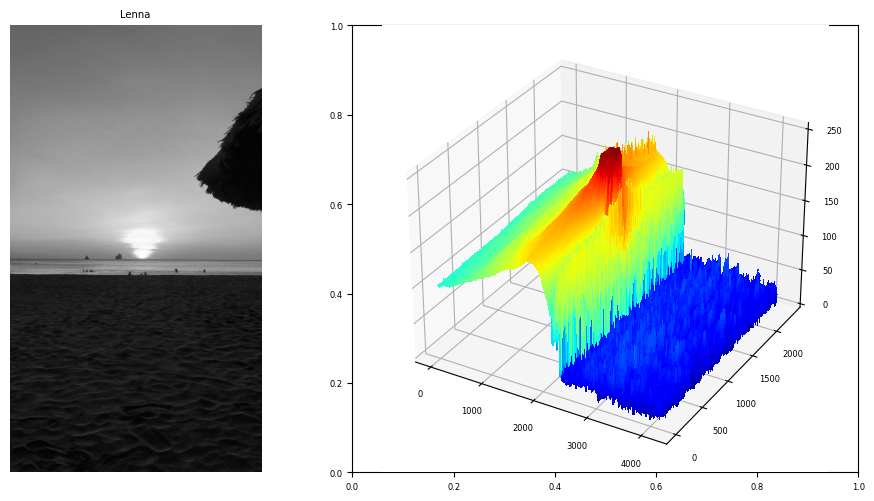

El proceso tardó: 109.4496853351593


In [ ]:
# Levantamiento 3d de la imagen
#ap_12.8
from matplotlib import pylab as pl

start = time.time()
datos = imagen_convertida[::1,::1]
# preparar para desplegar dos imágenes
fig, axes = plt.subplots(1,2, figsize=(10, 5))
ax = axes.ravel()
#tamaño de letra de los títulos
plt.rcParams.update({'font.size': 6})
#para desplegar imagen original
ax[0].imshow(imagen,cmap='gray')
#título
ax[0].set_title("Lenna")
# apagar ejes
ax[0].axis('off')
x,y = np.mgrid[:datos.shape[0],:datos.shape[1]]
ax[0] = fig.add_subplot(1,2,2,projection='3d')
ax[0].plot_surface(x,y,datos,cmap=pl.cm.jet,rstride=3,cstride=3,linewidth=1,antialiased=
False)
#despliega la imagen
fig.tight_layout()
plt.show()
end = time.time()
print('El proceso tardó:', end - start)

**Histograma**

Informa sobre el número de píxeles que hay para cada nivel de gris.
Normalizado a la unidad, puede entenderse como la probabilidad de que un valor de gris
determinado aparezca en la imágen.\
La forma del histograma
proporciona información importante como la intensidad media y la dispersión de los
valores de nivel de gris, siendo esta última, la medida de contraste de la imagen.
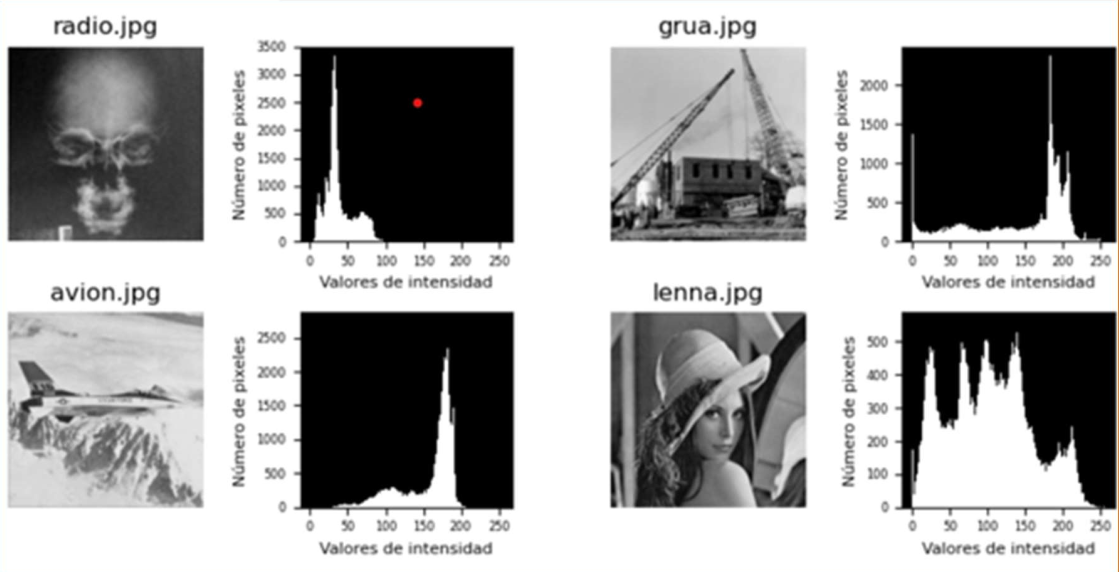
Cuanto mayor es la dispersión a lo largo del eje de los niveles de gris, mayor es el contraste de la
imagen y es entonces cuando el sistema visual humano consigue una mejor respuesta en su
apreciación de la imagen.

El proceso tardó: 0.6198651790618896


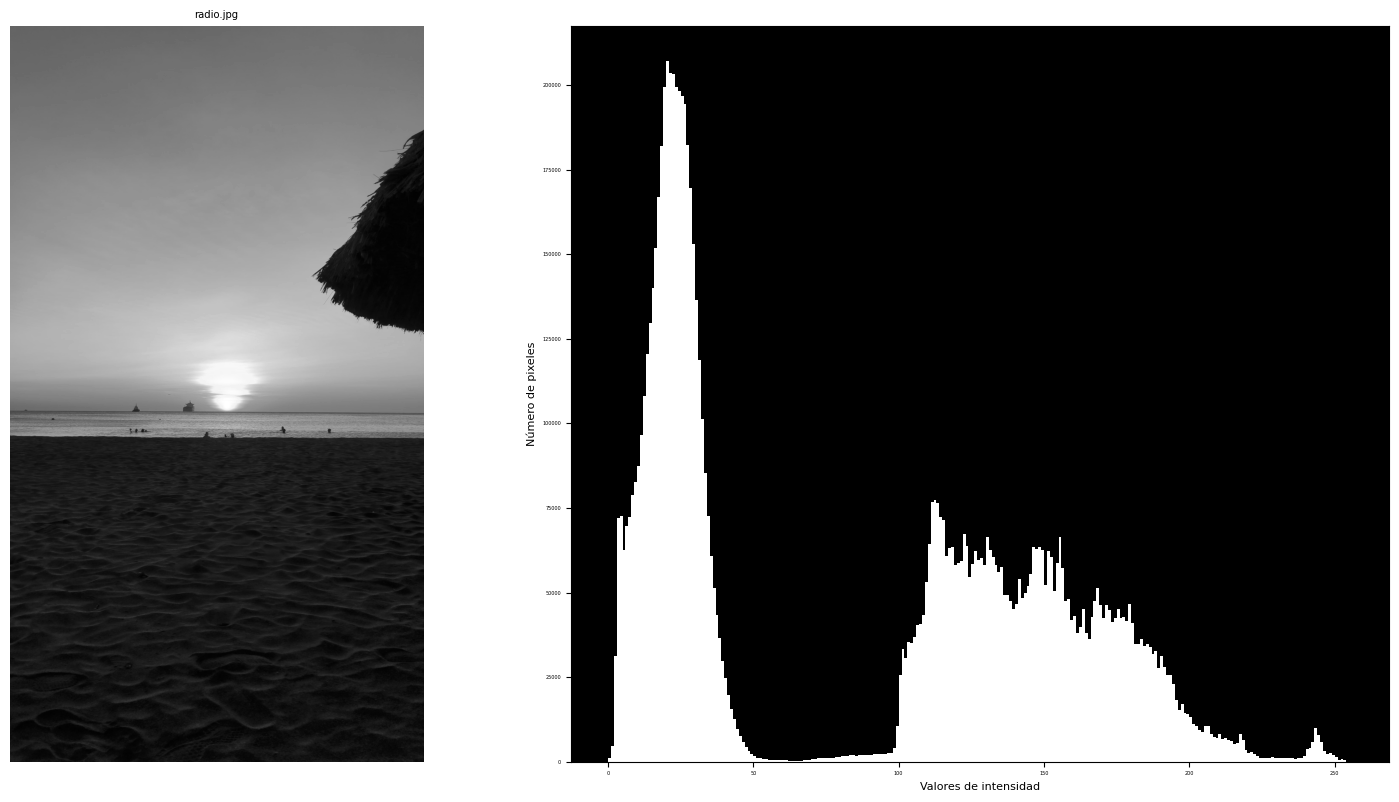

In [ ]:
import time
start = time.time()#para medir tiempo

#Preparar para desplegar la imagen y el histograma
fig, axes = plt.subplots(1,2, figsize=(16, 8))
ax = axes.ravel()
ax[0].imshow(imagen,cmap='gray')
ax[0].axis('off') # apagar ejes
ax[0].set_title("radio.jpg") #título
#histogramas con bins = 256: 256 intervalos
ax[1].hist(imagen.ravel(), 256, [0,256],color = 'white', alpha = 1.0)
#formato de font
ax[1].set_xlabel('Valores de intensidad', fontsize=8)
ax[1].set_ylabel('Número de pixeles',fontsize=8)
ax[1].xaxis.set_tick_params(labelsize='xx-small')
ax[1].yaxis.set_tick_params(labelsize='xx-small')
#color del fondo
ax[1].set_facecolor('black')

fig.tight_layout()
#finaliza medición de tiempo
end = time.time()
print('El proceso tardó:', end -start)
plt.show( )

El proceso tardó: 3.233513832092285


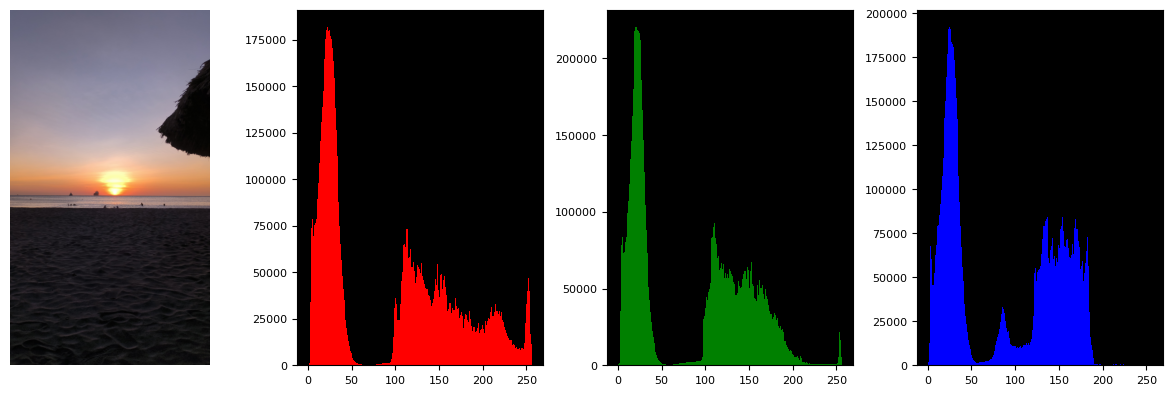

In [ ]:
#contar tiempo
start = time.time()
#carga la imagen
imagen = imagen_original
# tamaño de letra de los títulos
plt.rcParams.update({'font.size': 8})
# preparar para desplegar cuatro imágenes
# y sus histogramas
fig, axes = plt.subplots(1,4,figsize=(12,4))
ax = axes.ravel()
ax[0].imshow(imagen)
ax[0].axis('off') # apagar ejes
ax[1].hist(imagen[:, :, 0].ravel(), 256, [0,256], color = 'red', alpha = 1.0)
#color del fondo
ax[1].set_facecolor('black')
ax[2].hist(imagen[:, :, 1].ravel(), 256, [0,256], color = 'green', alpha = 1.0)
#color del fondo
ax[2].set_facecolor('black')
ax[3].hist(imagen[:, :, 2].ravel(), 256, [0,256], color = 'blue', alpha = 1.0)
ax[3].set_facecolor('black')
fig.tight_layout()
#finaliza tiempo
end = time.time()
print('El proceso tardó:', end -start)
plt.show( )

Nota:
También se puede hacer operaciones con imágenes como sumarlas, restarlas, dividir e incluso operaciones lógicas (and, or, etc)
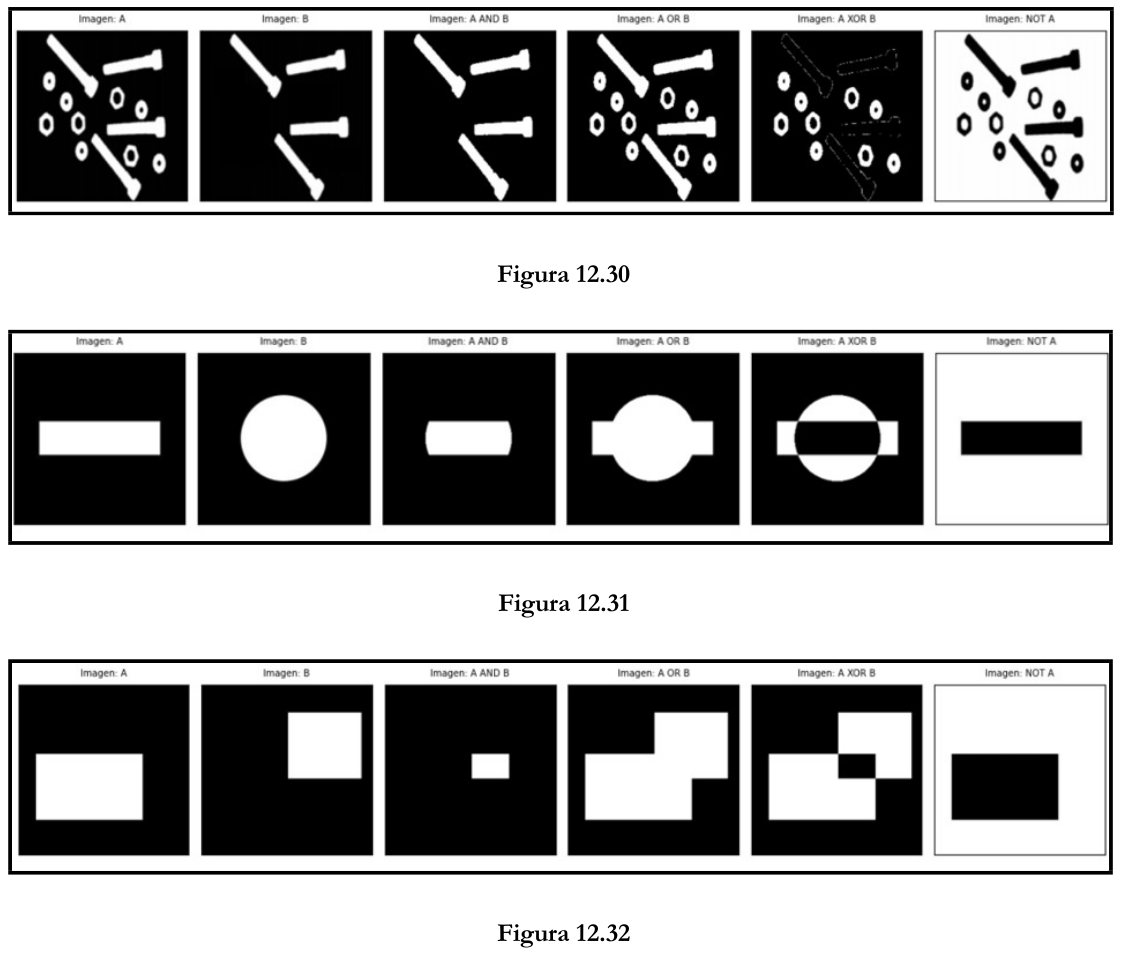

Se pueden realizar también **transformaciones afines**.\
Son aquellas que al realizarse conserva el paralelismo entre los segmentos que lo eran antes de la transformación.
ej: Traslación, rotación y magnificación.

## **Módulo 14**
Convolución y filtros

Las redes neuronales convolucionales (**CNN**, por sus siglas en inglés) apoyan su
funcionamiento en los **filtros** sobre imágenes (convoluciones de filtros con imágenes)
para **encontrar información** en ellas que les permita aprender a clasificarlas y diferenciarlas. \

La teoría de estos filtros se apoya en la forma cómo se puede **representar** una imagen
usando la **superposición de funciones elementales** como lo son los deltas de Dirac y las
funciones sinuosidales.

En éste módulo se estudian filtros básicos y la operación de convolución que es através de
la cual que éstos buscan la información de la imagen. Se avanzará mostrando cómo mediante
la convolución de la imagen f(x, y) con filtros espaciales h(x, y) se puede lograr suavizar o
remarcar bordes de ésta. Los primeros se denomina filtros pasa baja, ya que equivalen a
dejar pasar las frecuencias más bajas en el dominio de las frecuencias, los segundos se
denominan filtros de pasa alta por el efecto contrario. Hay otros filtros lineales intermedios
entres estos dos y se denominan filtros pasa banda.

In [ ]:
imagen.shape

(4160, 2338, 3)

El proceso tardó: 66.9775984287262


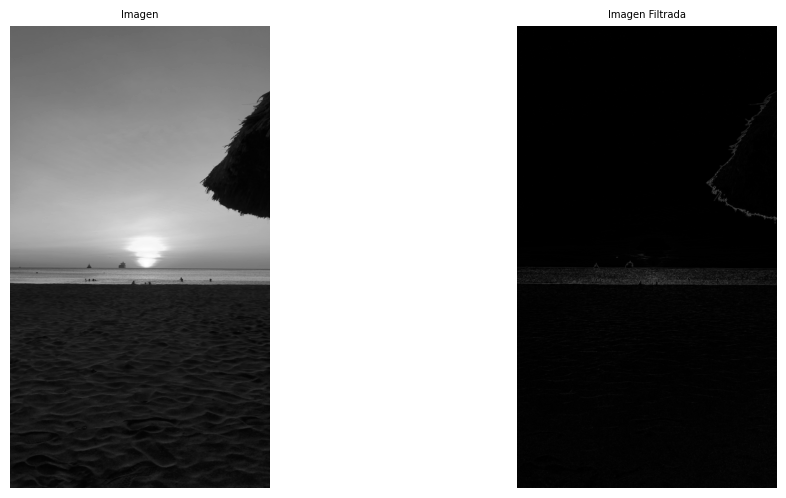

In [ ]:
#ap_14.1
import time
start = time.time()#para medir tiempo
#carga la imágenes y se convierte en arreglo NumPy tipo float
imagen_fuente = imagenbn
#convertir los arreglos a float
imagen_fuente_float = np.asarray(imagen_fuente,dtype=np.float32)
#preparar para desplegar resultados
f = plt.figure(figsize=(12,6))
ax1 = f.add_subplot(1, 2, 1)
ax2 = f.add_subplot(1, 2, 2)
plt.rcParams.update({'font.size':6})

def convolve2d(imagen, kernel): #función para hacer convolución (Importante)
  m, n = kernel.shape
  if (m == n):                 # solo definimos para kernels cuadrados
    y, x = imagen.shape
    y = y - m + 1              # al pasar el kernel por la imagen se pierden los bordes (no hemos hecho padding)
    x = x - m + 1
    nueva_imagen = np.zeros((y,x))  # preparamos un nuevo lugar para el resultado
    for i in range(y):
      for j in range(x):
        valor = np.sum(imagen[i:i+m, j:j+m]*kernel)
        if(valor<0):
          valor = 0 #evitar overflow
        if(valor>255):
          valor = 255
        nueva_imagen[i][j]= valor #evitar overflow
  return nueva_imagen
#kernel
kernel= np.array([[-1, -1, -1],
[-1, 8, -1],
[-1, -1, -1]])
imagen_filtrada=convolve2d(imagen_fuente_float,kernel)
ax1.set_title("Imagen")
ax1.imshow(imagen_fuente_float, cmap='gray')
#apagar ejes
ax1.axis('off')
ax2.set_title("Imagen Filtrada")
#ax2.imshow(np.abs(imagen_filtrada), cmap='gray')
ax2.imshow(imagen_filtrada, cmap='gray')
#apagar ejes
ax2.axis('off')
#finaliza medición de tiempo
end = time.time()
print('El proceso tardó:', end -start)
plt.show()

Ahora vamos a desarrollar el ejemplo de un filtro paso bajo, para ello usaremos una imagen distinta donde se noten más detalles de la vista de un "Fractal", se puede descargar la imágen en [Fractal](https://github.com/quantumcomputingunalmed/Course_AI/blob/17be639cb7e86763724b772c7d0823f14106e491/Fractal_2.jpg).\
Como la imágen se encuentra en RGB se deberá usar la función definida al inicio del cuaderno para codificarla en escala de grises.



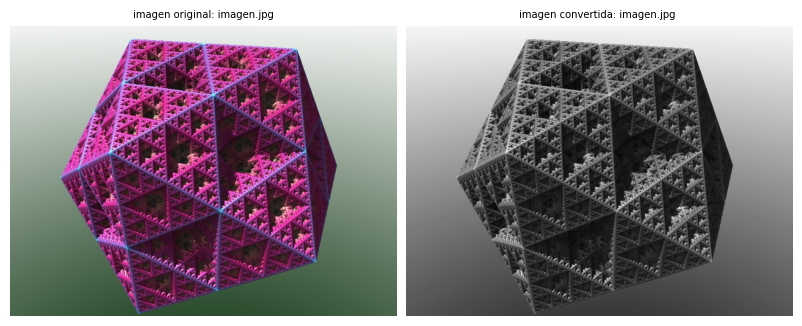

In [ ]:
import matplotlib.pyplot as plt
fractal = plt.imread("/content/Fractal_2.jpg")
imagen = rgb2gray(fractal)

fig, axes = plt.subplots(1,2, figsize=(8, 4))
ax = axes.ravel()

#para desplegar imagen original
ax[0].imshow(fractal,cmap='gray')
#título
ax[0].set_title("imagen original: imagen.jpg")
# apagar ejes
ax[0].axis('off')
#para desplegar imagen convertida
ax[1].imshow(imagen,cmap='gray')
#título
ax[1].set_title("imagen convertida: imagen.jpg ")
# apagar ejes
ax[1].axis('off')
#despliega la imagen
fig.tight_layout()
plt.show()

El proceso tardó: 5.1075122356414795


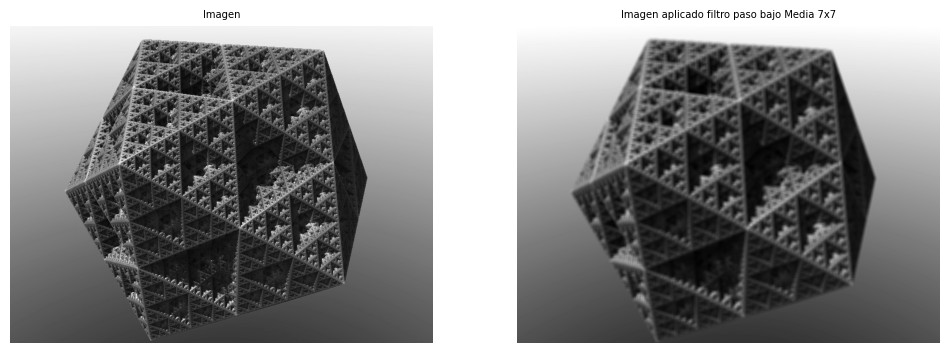

In [ ]:
"""  Filtro paso bajo  (suavizar/eliminar contrastes altos)"""

start = time.time()#para medir tiempo
#carga la imágenes y se convierte en arreglo NumPy tipo float
imagen_fuente = imagen
#convertir los arreglos a float
imagen_fuente_float =np.asarray(imagen_fuente,dtype=np.float32)
#preparar para desplegar resultados
f = plt.figure(figsize=(12,6))
ax1 = f.add_subplot(1, 2, 1)
ax2 = f.add_subplot(1, 2, 2)
plt.rcParams.update({'font.size':6})
def convolve2d(imagen, kernel):
  m, n = kernel.shape
  if (m == n):
    y, x = imagen.shape
    y = y - m + 1
    x = x - m + 1
    nueva_imagen = np.zeros((y,x))
    for i in range(y):
      for j in range(x):
        valor = np.sum(imagen[i:i+m, j:j+m]*kernel)
        if(valor<0):
          valor = 0 #evitar overflow
        if(valor>255):
          valor = 255
        nueva_imagen[i][j]= valor #evitar overflow
  return nueva_imagen
#kernel: aquí van los coeficientes del filtro
kernel= np.array([[ 1, 1, 1, 1, 1, 1, 1],
[ 1, 1, 1, 1, 1, 1, 1],
[ 1, 1, 1, 1, 1, 1, 1],
[ 1, 1, 1, 1, 1, 1, 1],
[ 1, 1, 1, 1, 1, 1, 1],
[ 1, 1, 1, 1, 1, 1, 1],
[ 1, 1, 1, 1, 1, 1, 1]])
coeficiente= 1/49.
kernel = coeficiente*kernel
imagen_filtrada=convolve2d(imagen_fuente_float,kernel)
ax1.set_title("Imagen")
ax1.imshow(imagen_fuente_float, cmap='gray')
#apagar ejes
ax1.axis('off')
ax2.set_title("Imagen aplicado filtro paso bajo Media 7x7")
ax2.imshow(imagen_filtrada, cmap='gray')
#apagar ejes
ax2.axis('off')
#finaliza medición de tiempo
end = time.time()
print('El proceso tardó:', end -start)
plt.show()

El proceso tardó: 37.67456841468811


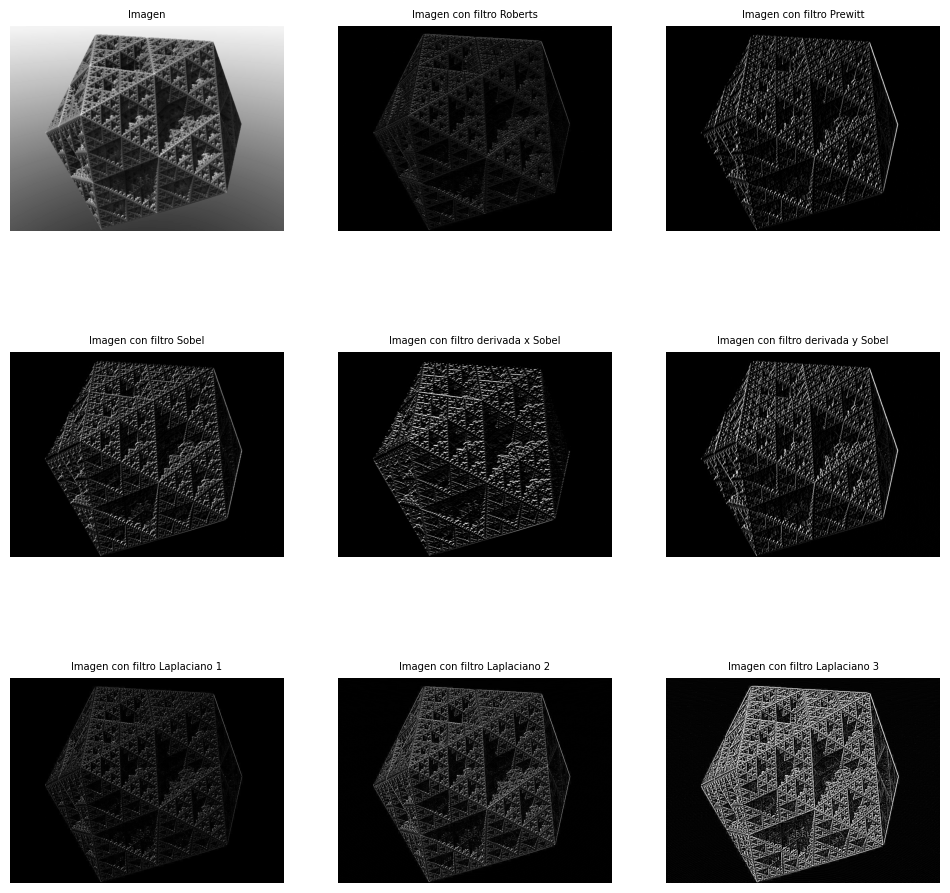

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time
start = time.time() #para medir tiempo

#convertir los arreglos a float
imagen_fuente_float =np.asarray(imagen,dtype=np.float32)

#preparar para desplegar resultados
f = plt.figure(figsize=(12,12))
ax1 = f.add_subplot(3, 3, 1)
ax2 = f.add_subplot(3, 3, 2)
ax3 = f.add_subplot(3, 3, 3)
ax4 = f.add_subplot(3, 3, 4)
ax5 = f.add_subplot(3, 3, 5)
ax6 = f.add_subplot(3, 3, 6)
ax7 = f.add_subplot(3, 3, 7)
ax8 = f.add_subplot(3, 3, 8)
ax9 = f.add_subplot(3, 3, 9)
plt.rcParams.update({'font.size':6})

#si se aplican dos máscaras
def filtros_dos_mascaras(imagen, kernel_1, kernel_2):
  resultado_1 = convolve2d(imagen, kernel_1)
  resultado_2 = convolve2d(imagen, kernel_2)
  resultado = resultado_1 + resultado_2
  return resultado
  """Ahora definamos algunos filtros importantes"""
#filtro Roberts
kernel_x_Roberts= np.array([[ 1, 0],
[ 0, -1]])
kernel_y_Roberts= np.array([[ 0, 1],
[-1, 0]])
imagen_filtrada_roberts = filtros_dos_mascaras(imagen_fuente_float,kernel_x_Roberts,kernel_y_Roberts)

#filtro Prewitt
kernel_x_Prewitt= np.array([[-1, -1, -1],
[ 0, 0, 0],
[-1, -1, -1]])
kernel_y_Prewitt= np.array([[-1, 0, 1],
[-1 , 0, 1],
[-1 , 0, 1]])
imagen_filtrada_prewitt = filtros_dos_mascaras(imagen_fuente_float,kernel_x_Prewitt,kernel_y_Prewitt)
#Filtro Sobel
kernel_x_Sobel= np.array([[-1, -2, -1],
[ 0, 0, 0],
[ 1, 2, 1]])
kernel_y_Sobel= np.array([[ -1, 0, 1],
[ -2, 0, 2],
[ -1, 0, 1]])
imagen_filtrada_sobel = filtros_dos_mascaras(imagen_fuente_float,kernel_x_Sobel,kernel_y_Sobel)
#filtro derivada en x con Sobel
kernel_x_Sobel= np.array([[-1, -2, -1],
[ 0, 0, 0],
[ 1, 2, 1]])
imagen_filtrada_gx_sobel = convolve2d(imagen_fuente_float, kernel_x_Sobel)
#filtro derivada en y con Sobel
kernel_y_Sobel= np.array([[-1, 0, 1],
[-2, 0, 2],
[-1, 0, 1]])
imagen_filtrada_gy_sobel = convolve2d(imagen_fuente_float, kernel_y_Sobel)
#filtro Laplaciano 1
kernel_Laplaciano_1= np.array([[ 0, -1, 0],
[-1, 4, -1],
[ 0, -1, 0]])
imagen_filtrada_laplaciano_1 = convolve2d(imagen_fuente_float, kernel_Laplaciano_1)
#filtro Laplaciano 2
kernel_Laplaciano_2= np.array([[-1, -1, -1],
[-1, 8, -1],
[-1, -1, -1]])
imagen_filtrada_laplaciano_2 = convolve2d(imagen_fuente_float, kernel_Laplaciano_2)
#Filtro Laplaciano 3
kernel_Laplaciano_3= np.array([[ -1, -1, -1, -1, -1],
[ -1, -1, -1, -1, -1],
[ -1, -1, 24, -1, -1],
[ -1, -1, -1, -1, -1],
[ -1, -1, -1, -1, -1]])
imagen_filtrada_laplaciano_3 = convolve2d(imagen_fuente_float, kernel_Laplaciano_3)
#para filtro laplacianos
ax1.set_title("Imagen")
ax1.imshow(imagen_fuente_float, cmap='gray')
#apagar ejes
ax1.axis('off')

ax2.set_title("Imagen con filtro Roberts")
ax2.imshow(imagen_filtrada_roberts, cmap='gray')
#apagar ejes
ax2.axis('off')
ax3.set_title("Imagen con filtro Prewitt")
ax3.imshow(imagen_filtrada_prewitt, cmap='gray')
#apagar ejes
ax3.axis('off')
ax4.set_title("Imagen con filtro Sobel")
ax4.imshow(imagen_filtrada_sobel, cmap='gray')
#apagar ejes
ax4.axis('off')
ax5.set_title("Imagen con filtro derivada x Sobel")
ax5.imshow(imagen_filtrada_gx_sobel, cmap='gray')
#apagar ejes
ax5.axis('off')
ax6.set_title("Imagen con filtro derivada y Sobel")
ax6.imshow(imagen_filtrada_gy_sobel, cmap='gray')
#apagar ejes
ax6.axis('off')
ax7.set_title("Imagen con filtro Laplaciano 1")
ax7.imshow(imagen_filtrada_laplaciano_1, cmap='gray')
#apagar ejes
ax7.axis('off')
ax8.set_title("Imagen con filtro Laplaciano 2")
ax8.imshow(imagen_filtrada_laplaciano_2, cmap='gray')
#apagar ejes
ax8.axis('off')
ax9.set_title("Imagen con filtro Laplaciano 3")
ax9.imshow(imagen_filtrada_laplaciano_3, cmap='gray')
#apagar ejes
ax9.axis('off')
#finaliza medición de tiempo
end = time.time()
print('El proceso tardó:', end -start)
plt.show()

Ahora una explicación para usar tensorflow playground


## **Módulo 15**
Redes Neuronales Convolucionales (CNN)

**MI PRIMERA CNN**
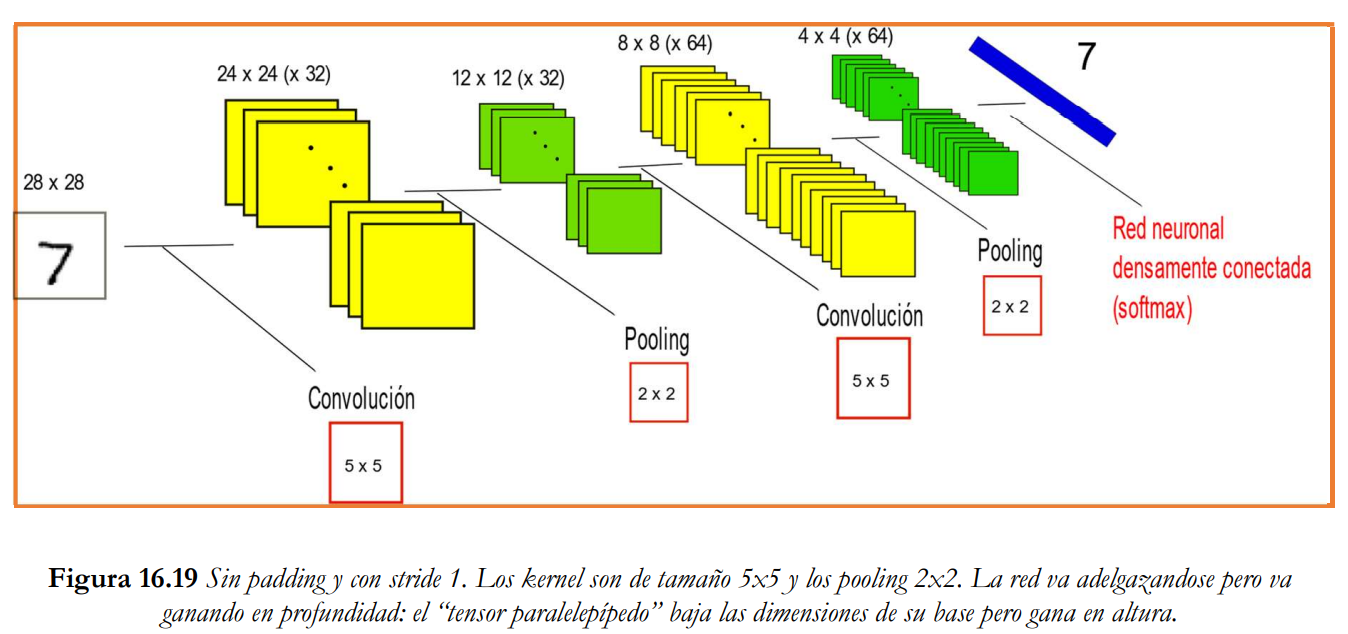

El modelo:

Implementar una primera capa oculta


*   Primera convolución: numero de filtros, padding, stride.


*   Aplicar la función de activación: la mas popular es ReLu (Rectifier Linear Unit).
*   Subsampling: hacer max pooling.

Continuar implementando capas ocultas...\
Conectar con una red neuronal tradicional.





*    Se crea el objeto modelo de tipo "Sequential".
*    Se aplican el número de dobles capas deseadas (capas convolución-pooling) con sus
respectivos hiperparámetros.
*    En Conv2D se configura padding, que puede tener dos valores: same, que implica añadir tantas filas y columnas de ceros como sea necesario para que la
salida teanga la misma dimensión que la entrada, y valid, que implica no hacer padding (este
es el valor por defecto de este argumento en keras). También se configura el
stride.\
 Por defecto su valor es 1. Recordar que estos hiperparámetros tienen efectos sobre
los tamaños de las imágenes de las características que van saliendo. Aquí también se define
la activación “relu”.
*    Se “aplanan” los tensores de datos antes de entrar a la red neuronal densamente conectada.
*    Se adiciona la capa densamente conectada. Aquí se definen el número de neuronas, y la
activación “softmax”.
*    Se compila defiendo aquí: el optimizador, la función de pérdida y la métrica.

In [2]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
#AQUÍ COMIENZA LA IMPLEMENTACIÓN DEL MODELO
#DE RED NEURONAL CONVOLUCIONAL
#crear el modelo secuencial
modelo = tf.keras.Sequential()
#aplicación de dobles capas Conv2D y poooling
modelo.add(Conv2D(32,(5,5), activation = 'relu', input_shape = (28, 28,1)))
modelo.add(MaxPooling2D((2,2)))
modelo.add(Conv2D(64,(5,5), activation = 'relu'))
modelo.add(MaxPooling2D((2,2)))
#aplanamiento del tensores de datos
modelo.add(Flatten())

"""Para continuar implementando el modelo se conectará una red neuronal densamente conectada
de 10 neuronas y con activación softmax."""
#adicionar la capa de red densamente conectada
modelo.add(Dense(10, activation = 'softmax'))
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 4, 4, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 10)               

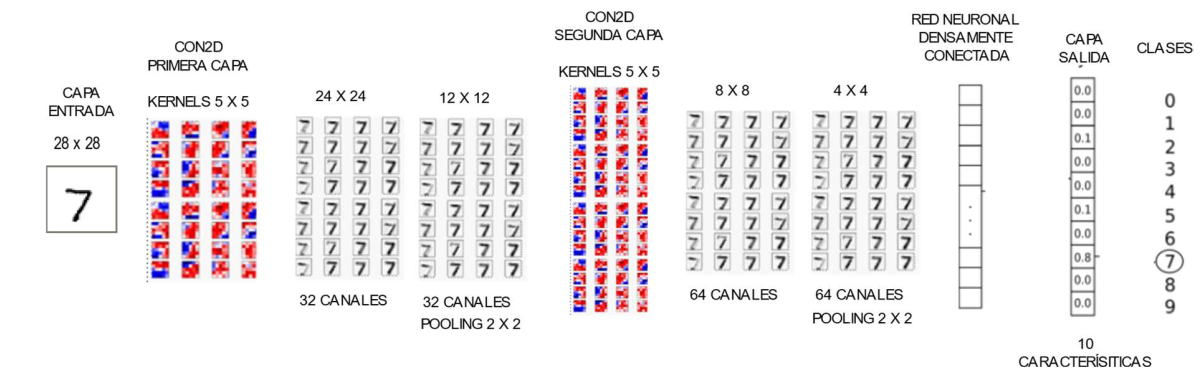

In [3]:
""" Una vez definido el modelo, se compila especificando la función de optimización, la de coste
o pérdida y las métricas que se usarán. En este caso, se usará función ADAM4 , la función de
pérdida de entropía cruzada ('categorical_crossentropy') y, para la métrica, accuracy5."""

#compilar el modelo
modelo.compile(optimizer = 'adam', loss ='categorical_crossentropy', metrics = ['accuracy'])
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 4, 4, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 10)               

**Entrenamiento**

In [5]:
#Cargar las muestras de entrenamiento y las de testeo
mnist = tf.keras.datasets.mnist
(imagenes_entrenamiento, etiquetas_entrenamiento), (imagenes_testeo, etiquetas_testeo) = mnist.load_data()

#pasar los tensores de alamacenamiento de 3D a 4D. Esto es, las imágenes grises de 2D a 3D
imagenes_entrenamiento = imagenes_entrenamiento.reshape (60000, 28,28,1)
imagenes_testeo = imagenes_testeo.reshape (10000, 28,28,1)
#normalizar las muestras
imagenes_entrenamiento = imagenes_entrenamiento.astype('float32')/255
imagenes_testeo = imagenes_testeo.astype('float32')/255
#codificar las etiquetas (label) en formato tipo one-hot
#esto lo hace Keras
etiquetas_entrenamiento = to_categorical(etiquetas_entrenamiento, num_classes=10)
etiquetas_testeo = to_categorical(etiquetas_testeo, num_classes=10)


#entrenamiento: ajuste
modelo.fit(imagenes_entrenamiento, etiquetas_entrenamiento, epochs = 5)
modelo.summary()

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 10s 4ms/step - loss: 0.1387 - accuracy: 0.9585
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0445 - accuracy: 0.9862
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0318 - accuracy: 0.9899
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0235 - accuracy: 0.9924
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0189 - accuracy: 0.9939
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
           

**Testing**

In [9]:
test_loss, test_acc = modelo.evaluate(imagenes_testeo, etiquetas_testeo)
modelo.summary()
#imprimir grado de predicción de la red
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0276 - accuracy: 0.9913
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 4, 4, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                               

Forma de la imagen:  (28, 28, 1)
313/313 [==============================] - 1s 2ms/step
Vector resultado de las predicciones:  [0.        0.        0.        0.        0.        0.        0.9999852
 0.        0.        0.       ]
Suma de las probabilidades: 0.9999852180480957


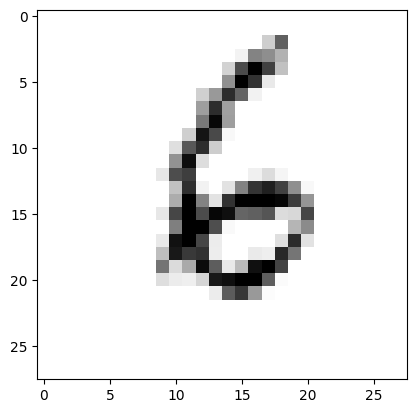

In [8]:
""" Veamos un ejemplo de testing """
import matplotlib.pyplot as plt
import numpy as np
#imágenes testeo
print("Forma de la imagen: ", imagenes_testeo[2000].shape)
#para desplegar esta imagen es necesario elminar la dimensión 3
plt.imshow(imagenes_testeo[2000,:,:,-1], cmap = plt.cm.binary)
#vector resultado de las predicciones
predicciones = modelo.predict(imagenes_testeo)
#valor predicción de la imagen imagenes_testeo[11]
#aqui se retorna el índice de la posición que contiene
#el valor más alto de la función
np.argmax(predicciones[2000])
#imprimir las prediciones
#menores que 0.001 hacerlos 0
predicciones[2000][predicciones[2000]<0.001] = 0.0
#desplegar solo hasta dos decimales
np.around(predicciones[2000], decimals=2)
print("Vector resultado de las predicciones: ", predicciones[2000])
#desplegar la suma
suma = sum(predicciones[2000])
print("Suma de las probabilidades:", suma)

El número desplegado es el que entra a la red neuronal convolucional.\
La salida predice que el
número efectivamente es 6.

Acá termina la implementación de nuestro primer modelo de red neuronal convolutiva, vemos que tiene **Un resultado excelente** para el dataset Mnist.

# Referencias


*   Diego Luis Aristizabal, Machine Learning: Auscultando las Redes Neuronales con python, Manipulación de datos (módulo 3).
*   Cuevas, A., “Python 3: Curso Práctico”, Ra-Ma, 2 017.
*   Cuevas, A., “Aplicaciones Gráficas con Python 3: Curso Práctico”, Ra-Ma, 2 018.
*   Pertusa, J., “Técnicas de Análisis de Imagen: Aplicaciones en Biología”, Universidad de Valencia, 2003.
*   Gonzalez R, Woods R, “Digital Image Processing,” 3rd. Edition, Prentice Hall, 2 008.
*   Pajares P., De la Cruz J. y otros, “Imágenes Digitales: Procesamiento Práctico con Java”,Alfaomega Ra-Ma, 2 004.
*   Douglas A., “Image Processing jn Java”, A Lyon Book, 1 999.
*   Rodriguez R., Sossa J., “Procesamiento y Análisis Digital de Imágenes”, Alfaomega Ra-
Ma, 2 012
Apress.
*   Hecht, “Óptica”, Addison Wesley, 2 000.
*   Goodman, J. , Calzadilla, O., Carreras, C., “Introducción a la Óptica de Fourier”, 2 008


